Import Dependencies

In [1]:
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense , MaxPooling2D, Input, Flatten
import tensorflow as tf

2024-07-28 14:46:48.135828: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-28 14:46:48.135882: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-28 14:46:48.137227: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-28 14:46:48.144185: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-28 14:46:48.995532: W tensorflow/compiler/tf2

Set GPU Growth

In [3]:
# Avoid out of memory error by setting gpu memory consumption growth

# List all physical devices of type 'GPU'
gpus = tf.config.experimental.list_physical_devices('GPU')

# Enable memory growth for each GPU
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

2024-07-28 14:46:49.937067: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-28 14:46:49.975303: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-28 14:46:49.975638: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [4]:
len(gpus)

1

Create Folder Stucture

In [5]:
POS_PATH = os.path.join('data','positive')
NEG_PATH = os.path.join('data','negetive')
ANC_PATH = os.path.join('data','anchor')

In [11]:
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

In [12]:
# Uncompress the negetive images 
!tar -xf lfw.tgz

In [13]:
# moving lfw images to data/negetive
for directory in os.listdir('lfw'):
    for files in os.listdir(os.path.join('lfw',directory)):
        EX_PATH = os.path.join('lfw',directory,files)
        NEW_PATH = os.path.join(NEG_PATH,files)
        os.replace(EX_PATH,NEW_PATH)

Collect Positive and Anchor images

In [6]:
# import uuid to generate unique image names 
import uuid

In [7]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret,frame = cap.read()

    # Cut down frame to 250x250 pixels
    frame = frame[120:120+250, 200:200+250, :]

    # Collect anchor 
    if cv2.waitKey(1) & 0XFF == ord('a'):
        print('a')
        #Create unique file path
        imgname = os.path.join(ANC_PATH, '{}.jpg' , format(uuid.uuid1()))

        # Write the anchor image
        cv2.imwrite(imgname , frame)




    # Collect positive 
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # Create unique file path
        imgname = os.path.join(POS_PATH, '{}.jpg', format(uuid.uuid1()))
        # write positive img
        cv2.imwrite(imgname , frame)


    #show image to screen 
    cv2.imshow('Image Collection' , frame)

    # breaking 
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break

# Release the webcam
cap.release()

# Close the image showframe
cv2.destroyAllWindows()

a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a


In [10]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(0)
while cap.isOpened(): 
    ret, frame = cap.read()
   
    # Cut down frame to 250x250px
    frame = frame[120:120+250,200:200+250, :]
    
    # Collect anchors 
    if cv2.waitKey(1) & 0XFF == ord('a'):
        # Create the unique file path 
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)
    
    # Collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # Create the unique file path 
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out positive image
        cv2.imwrite(imgname, frame)
    
    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

Get image directories

In [9]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(300)

InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: data/anchor\\*.jpg'

In [7]:
anchor = tf.data.Dataset.list_files(f"{ANC_PATH}/*.jpg").take(300)
positive = tf.data.Dataset.list_files(f"{POS_PATH}/*.jpg").take(300)
negative = tf.data.Dataset.list_files(f"{NEG_PATH}/*.jpg").take(300)


2024-07-28 14:47:04.817616: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-28 14:47:04.817911: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-28 14:47:04.818133: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [8]:
fir = anchor.as_numpy_iterator()

In [9]:
fir.next()

b'data/anchor/9ff02134-4c5a-11ef-bb73-b07d64e72afc.jpg'

Pre-processing 

In [10]:
def preprocess(file_path):
    # read image from file path
    byte_img = tf.io.read_file(file_path)

    #Load the img 
    img = tf.io.decode_jpeg(byte_img)

    # Resizing img to 100x100x3
    img = tf.image.resize(img,(100,100))

    # scale img between 0 to 1 
    img = img /255.0

    return img


In [11]:
img = preprocess('data/anchor/a00500f4-4c5a-11ef-bb73-b07d64e72afc.jpg')

In [12]:
img

<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
array([[[0.8235294 , 0.83137256, 0.81960785],
        [0.82843137, 0.8362745 , 0.82254905],
        [0.8235294 , 0.82843137, 0.8088235 ],
        ...,
        [0.85      , 0.8617647 , 0.8186275 ],
        [0.85294116, 0.86470586, 0.8215686 ],
        [0.8477941 , 0.8634804 , 0.80857843]],

       [[0.827451  , 0.8352941 , 0.8156863 ],
        [0.8281863 , 0.83431375, 0.8147059 ],
        [0.8303922 , 0.83431375, 0.8147059 ],
        ...,
        [0.8514706 , 0.8622549 , 0.81911767],
        [0.84681374, 0.8598039 , 0.80857843],
        [0.85490197, 0.8686274 , 0.8147059 ]],

       [[0.8303922 , 0.8352941 , 0.8127451 ],
        [0.83210784, 0.8360294 , 0.81421566],
        [0.827451  , 0.83137256, 0.8117647 ],
        ...,
        [0.8522059 , 0.860049  , 0.81102943],
        [0.8541667 , 0.8620098 , 0.8115196 ],
        [0.8536765 , 0.86151963, 0.8105392 ]],

       ...,

       [[0.73651963, 0.7404412 , 0.72083336],
        [0.73

In [13]:
img.numpy().max()

0.8693628

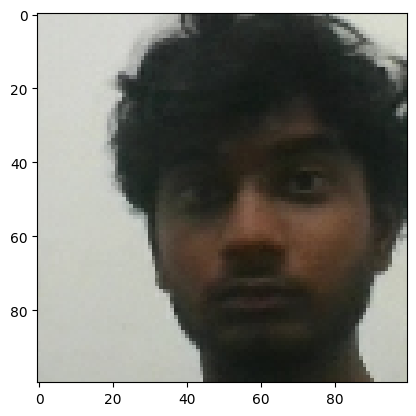

In [14]:
plt.imshow(img)

Creating Labelled Dataset

In [15]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [16]:
samples = data.as_numpy_iterator()


In [19]:
example = samples.next()


In [20]:
example

(b'data/anchor/a609842a-4c5a-11ef-bb73-b07d64e72afc.jpg',
 b'data/positive/cd5b73c0-4c5b-11ef-bb73-b07d64e72afc.jpg',
 1.0)

In [21]:
def preprocess_twin(input_img, validation_img, label):
    return (preprocess(input_img), preprocess(validation_img),label )

In [24]:
result  = preprocess_twin(*example)

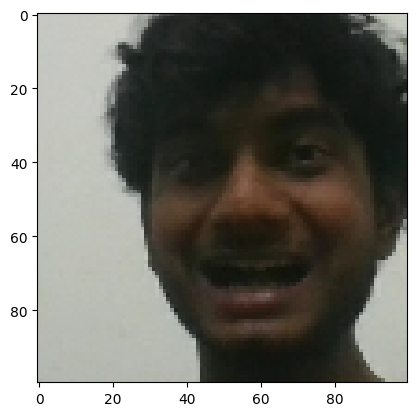

In [26]:
plt.imshow(result[0])

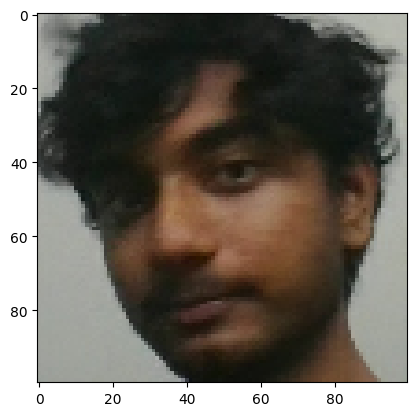

In [27]:
plt.imshow(result[1])

In [28]:
result[2]

1.0

In [29]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [30]:
data

<_ShuffleDataset element_spec=(TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [32]:
# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [33]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

Model embedding

In [34]:
def make_embedding():
    inp = Input(shape=(100,100,3) ,name='input_image' )

    # First Block
    c1 = Conv2D(64 , (10,10), activation = 'relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

    # Second Block
    c2 = Conv2D(128 , (7,7), activation = 'relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

    # Third Block
    c3 = Conv2D(128, (4,4), activation = 'relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

    # Final Block
    c4 = Conv2D(256, (4,4), activation= 'relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation = 'sigmoid')(f1)
    return Model(inputs = [inp] , outputs=[d1] , name='embedding' )

In [38]:
embedding = make_embedding()

In [39]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 46, 46, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 20, 20, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 17, 17, 128)       26

Siamese Distance

In [40]:
# Siamese L1 Distance class
class L1Dist(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [45]:
def make_siamese_model():
    input_image = Input(name='input_img', shape=(100,100,3))
    validation_image = Input(name='validation_img', shape=(100,100,3))

    #combine siamese distance component

    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))

    #classification layer
    classifier = Dense(1, activation = 'sigmoid')(distances)

    return Model(inputs= [input_image, validation_image], outputs = classifier, name= 'SiameseNetwork')

In [46]:
siamese_model = make_siamese_model()

In [47]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

Loss function

In [48]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

Optimizer

In [49]:
opt = tf.keras.optimizers.Adam(1e-4)